## Codio Activity 7.4: Mean Absolute Loss (MAE)

**Expected Time = 45 minutes**

**Total Points = 15**

This assignment focuses on minimizing the mean absolute value loss function defined as:

$${\displaystyle \mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}}$$

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

Using the same dataset as with our `l2_loss` function, you are to compute the value for $\theta$ that minimizes the MAE.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import minimize

### The Dataset

Again, a synthetic dataset is created as

$$y = 4.2x + \sigma$$

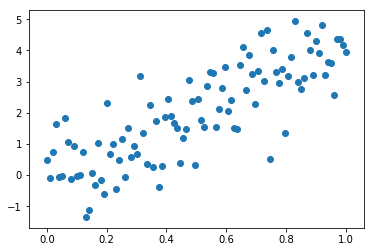

In [2]:
np.random.seed(42)
x = np.linspace(0, 1, 100)
y = 4.2*x + np.random.normal(size = 100)
plt.scatter(x, y)

[Back to top](#Index:) 

## Problem 1

### A MAE loss function

**5 Points**

Complete the `mae` function below that takes in a value for $\theta$.

Your functio should compute and and return the mean absolute error based on the model $y = \theta*x$.  

In [13]:
### GRADED

def mae_loss(theta):
    """
    This function accepts an array of thetas
    and returns the mean absolute error based
    on np.mean(|(theta*xi - yi)|)
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
            
    Returns
    -------
    mse: np.float
         Mean Absolute Error
    """

    return np.mean(np.abs((theta * x) - y))

mae = mae_loss(8)
print(mae)
print(type(mae))

2.12145907129924
<class 'numpy.float64'>


[Back to top](#Index:) 

## Problem 2

### Minimizing the MAE Loss

**5 Points**

Use the `minimize` function imported from `scipy.optimize` to determine the value for `mae_loss` that minimizes the Mean Absolute Error loss function starting at `x0 = 4`.  Assign this result to `minimum_theta `.

Next, use the `minimum_theta.x[0]` attribute to assign the solution as a float to `theta_mae` below.

In [14]:
### GRADED
minimum_theta = minimize(mae_loss, x0 = 4)
theta_mae = minimum_theta.x[0]

# Answer check
print(type(theta_mae))
print(theta_mae)

<class 'numpy.float64'>
4.150739192004366


[Back to top](#Index:) 

## Problem 3

### Uncovering the true $\theta$

**5 Points**

Assuming that the true relationship between $x$ and $y$ was determined by a model with $\theta = 4.2$, which loss function better approximated the true value for $\theta$ here?  Enter your answer as a string -- either 'mse' or 'mae' -- below to the variable `better_loss`.

In [16]:
### GRADED
def l2_loss(theta):
    """
    This function accepts a single theta value
    and calculates the mean squared error based
    on (theta*x - y)^2

    Arguments
    ---------
    theta: float
    The value to use for the parameter of the
    regression model.

    Returns
    -------
    mse: float
    Mean Squared Error
    """

    return np.mean(((theta*x) - y)**2)

minimum_theta_mse = minimize(l2_loss, x0 = 4)
theta_mse = minimum_theta_mse.x[0]
print(theta_mse)
better_loss = 'mae'

# Answer check
print(type(better_loss))
print(better_loss)

4.08001600728423
<class 'str'>
mae


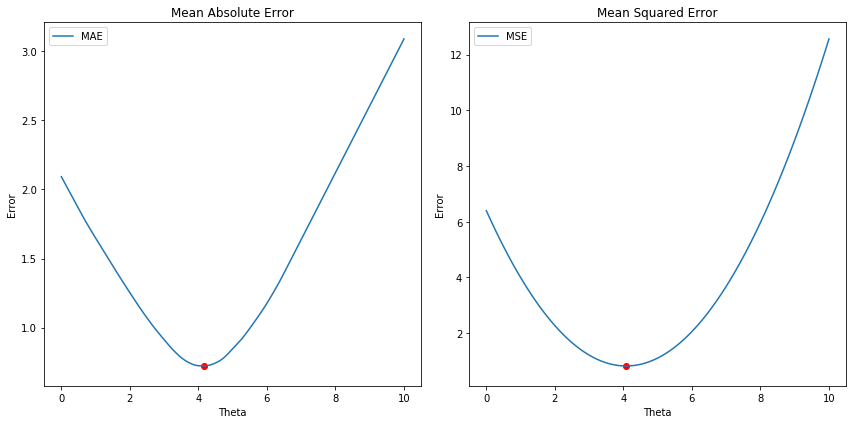

In [17]:
# Creating a range of theta values
theta_values = np.linspace(0, 10, 100)

# Calculating MAE and MSE for each theta value
mae_values = [mae_loss(theta) for theta in theta_values]
mse_values = [l2_loss(theta) for theta in theta_values]

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MAE values
ax1.plot(theta_values, mae_values, label='MAE')
ax1.scatter([minimum_theta.x[0]], [mae_loss(minimum_theta.x[0])], color='red')  # minimum point
ax1.set_title('Mean Absolute Error')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Error')
ax1.legend()

# Plotting MSE values
ax2.plot(theta_values, mse_values, label='MSE')
ax2.scatter([minimum_theta_mse.x[0]], [l2_loss(minimum_theta_mse.x[0])], color='red')  # minimum point
ax2.set_title('Mean Squared Error')
ax2.set_xlabel('Theta')
ax2.set_ylabel('Error')
ax2.legend()

# Displaying the plot
plt.tight_layout()
plt.show()